In [10]:
from probability import *

In [11]:
%reload_ext autoreload

%autoreload 2


In [12]:
# init

net = CNN()
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True,
)

test_data = datasets.MNIST(
    root='data',
    train=False,
    transform=ToTensor()
)

mnist_train = torch.utils.data.DataLoader(train_data,
                                          batch_size=100,
                                          shuffle=True,
                                          num_workers=1)

mnist_test = torch.utils.data.DataLoader(test_data,
                                         batch_size=100,
                                         shuffle=True,
                                         num_workers=1)

total_step = len(mnist_train)
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.01)
    

In [13]:
# train

net.train()
num_epochs = 10
probality = Probability(mnist_train, net)
probality.step(is_first=True)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(mnist_train):
        output = net(images)[0]
        loss = loss_func(output, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if (i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))
            torch.save(net.state_dict(), "mnist_model.pth")
    probality.step(is_first=False)

        

------get pX-------
------get pXY------
-------get pZ--------
-------get all prob-------
-------get entropy--------
Epoch [1/10], Step [100/600], Loss: 0.1112
Epoch [1/10], Step [200/600], Loss: 0.0923
Epoch [1/10], Step [300/600], Loss: 0.0817
Epoch [1/10], Step [400/600], Loss: 0.0492
Epoch [1/10], Step [500/600], Loss: 0.0451
Epoch [1/10], Step [600/600], Loss: 0.1298
-------get pZ--------
-------get all prob-------
-------get entropy--------
Epoch [2/10], Step [100/600], Loss: 0.1540
Epoch [2/10], Step [200/600], Loss: 0.0683
Epoch [2/10], Step [300/600], Loss: 0.0359
Epoch [2/10], Step [400/600], Loss: 0.0101
Epoch [2/10], Step [500/600], Loss: 0.0392
Epoch [2/10], Step [600/600], Loss: 0.0214
-------get pZ--------
-------get all prob-------
-------get entropy--------
Epoch [3/10], Step [100/600], Loss: 0.0037
Epoch [3/10], Step [200/600], Loss: 0.0415
Epoch [3/10], Step [300/600], Loss: 0.0202
Epoch [3/10], Step [400/600], Loss: 0.0581
Epoch [3/10], Step [500/600], Loss: 0.0343
E

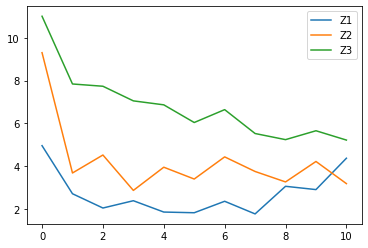

In [37]:
import numpy as np

plt.plot(np.array(probality.I_xz1) - np.array(probality.I_yz1), label="Z1")
plt.plot(np.array(probality.I_xz2) - np.array(probality.I_yz2), label="Z2")
plt.plot(np.array(probality.I_xz3) - np.array(probality.I_yz3), label="Z3")

Я 
plt.legend()
plt.show()

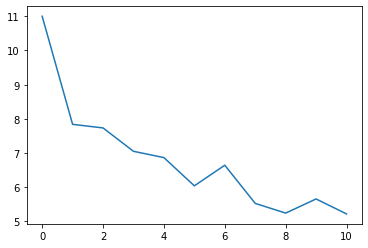

In [32]:
plt.plot(probality.I_xz3[0:])